In [1]:
# the goal of this notebook is to test to see how intecept and slope effect TMP shape for a theoretical trough
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op
import mars_troughs as mt
import emcee, corner

%matplotlib inline
plt.rc("font", size=14, family="serif")

In [29]:
# Create trough object
accum_slope = 1e-7 #5.4e-7   #m/yr - Why isn't this also in mm/yr?
accum_intercept = 0   #m
test_acc_params = [accum_intercept, accum_slope]
lag_slope = 0    #mm/yr
lag_intercept = 8.6   #mm
test_lag_params = [lag_intercept, lag_slope]

acc_model_number = 0
lag_model_number = 1

errorbar = np.sqrt(1.6) #errorbar in pixels on the datapoints
tr1 = mt.Trough(test_acc_params, test_lag_params,
                acc_model_number, lag_model_number,
                errorbar)

accum_slope2 = 1e-7 #5.4e-7
accum_intercept2 = 1e-4
test_acc_params2 = [accum_intercept2, accum_slope2]
lag_slope2 = -1e-5
lag_intercept2 = 10
test_lag_params2 = [lag_intercept2, lag_slope2]


tr2 = mt.Trough(test_acc_params2, test_lag_params2,
                acc_model_number, lag_model_number,
                errorbar)


[intercept, slope]
[Test 1]  Accum:  [0, 1e-07]  and Lag:  [8.6, 0]
[Test 2]  Accum:  [0.0001, 1e-07]  and Lag:  [10, -1e-05]
Dot is for the same time point


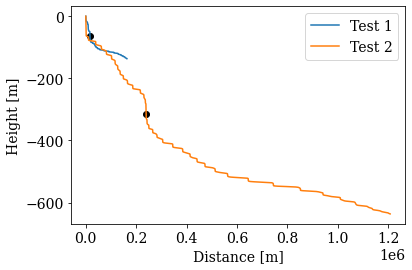

In [30]:
# Plot Trough model

#Compare the trajectory with data
times1 = tr1.ins_times
plt.plot(tr1.get_trajectory(times1)[0], tr1.get_trajectory(times1)[1], label='Test 1')

times2 = tr2.ins_times
plt.plot(tr2.get_trajectory(times2)[0], tr2.get_trajectory(times2)[1], label='Test 2')

plt.scatter(tr1.get_trajectory(int(times1[2500]))[0], tr1.get_trajectory(int(times1[2500]))[1], c='k')
plt.scatter(tr2.get_trajectory(int(times2[2500]))[0], tr2.get_trajectory(int(times2[2500]))[1], c='k')
plt.legend()
plt.xlabel(r"Distance [m]")
plt.ylabel(r"Height [m]")
#plt.xlim(xlim)
#plt.ylim(ylim)

print('[intercept, slope]')
print('[Test 1] ', 'Accum: ', test_acc_params, ' and Lag: ', test_lag_params)
print('[Test 2] ', 'Accum: ', test_acc_params2, ' and Lag: ', test_lag_params2)

print('Dot is for the same time point')


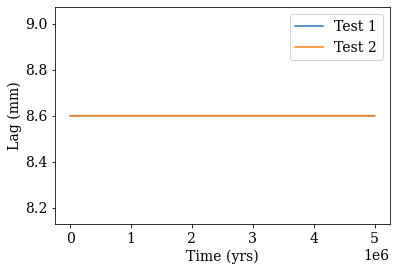

In [4]:
# plot accumulation and sublimation or migration rates
# Lag in time
lag1_full = tr1.lag_model_t
lag2_full = tr2.lag_model_t

plt.plot(times1, lag1_full, label='Test 1')
plt.plot(times2, lag2_full, label='Test 2')
plt.legend()
plt.ylabel('Lag (mm)')
plt.xlabel('Time (yrs)')
plt.show()


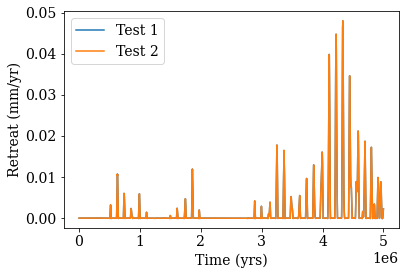

In [5]:
# Retreat in time
retreat1_full = tr1.retreat_model_t
retreat2_full = tr2.retreat_model_t

plt.plot(times1, retreat1_full, label='Test 1')
plt.plot(times2, retreat2_full, label='Test 2')
plt.legend()
plt.ylabel('Retreat (mm/yr)')
plt.xlabel('Time (yrs)')
plt.show()


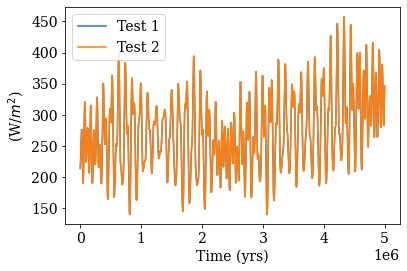

In [6]:
# Insolation in time
plt.plot(times1, tr1.insolation, label='Test 1')
plt.plot(times2, tr2.insolation, label='Test 2')
plt.legend()
plt.ylabel(r'(W/$m^2$)')
plt.xlabel('Time (yrs)')
plt.show()

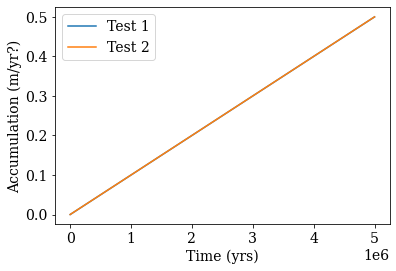

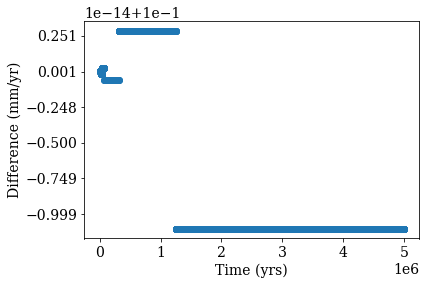

In [7]:
# Accumulation in time
accumulation1_full = tr1.accuModel.get_accumulation_at_t(times1)
accumulation2_full = tr2.accuModel.get_accumulation_at_t(times2)

plt.plot(times1, accumulation1_full, label='Test 1')
plt.plot(times2, accumulation2_full, label='Test 2')
plt.legend()
plt.ylabel('Accumulation (m/yr?)')
plt.xlabel('Time (yrs)')
plt.show()

plt.scatter(times1, (accumulation2_full - accumulation1_full)*10**(3))
plt.ylabel('Difference (mm/yr)')
plt.xlabel('Time (yrs)')
plt.show()


In [8]:
# Now try with quad
# Create trough object
accum_quad = 1e-9
accum_slope = 1e-7 #5.4e-7   #m/yr - Why isn't this also in mm/yr?
accum_intercept = 0   #m
test_acc_params = [accum_intercept, accum_slope, accum_quad]
lag_slope = 0    #mm/yr
lag_intercept = 8.6   #mm
test_lag_params = [lag_intercept, lag_slope]

acc_model_number = 1
lag_model_number = 1

errorbar = np.sqrt(1.6) #errorbar in pixels on the datapoints
tr1 = mt.Trough(test_acc_params, test_lag_params,
                acc_model_number, lag_model_number,
                errorbar)
accum_quad2 = 0
accum_slope2 = 1e-7 #5.4e-7
accum_intercept2 = 0
test_acc_params2 = [accum_intercept2, accum_slope2, accum_quad2]
lag_slope2 = 0
lag_intercept2 = 8.6
test_lag_params2 = [lag_intercept2, lag_slope2]


tr2 = mt.Trough(test_acc_params2, test_lag_params2,
                acc_model_number, lag_model_number,
                errorbar)

[intercept, slope, quad]
[Test 1]  Accum:  [0, 1e-07, 1e-09]  and Lag:  [8.6, 0]
[Test 2]  Accum:  [0, 1e-07, 0]  and Lag:  [8.6, 0]
Dot is for the same time point


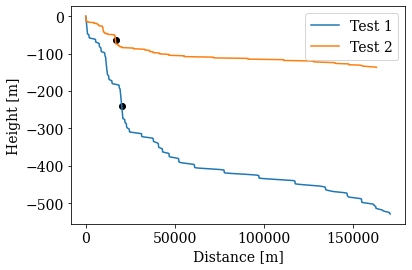

In [9]:
# Plot Trough model

#Compare the trajectory with data
times1 = tr1.ins_times
plt.plot(tr1.get_trajectory(times1)[0], tr1.get_trajectory(times1)[1], label='Test 1')

times2 = tr2.ins_times
plt.plot(tr2.get_trajectory(times2)[0], tr2.get_trajectory(times2)[1], label='Test 2')

plt.scatter(tr1.get_trajectory(int(times1[2500]))[0], tr1.get_trajectory(int(times1[2500]))[1], c='k')
plt.scatter(tr2.get_trajectory(int(times2[2500]))[0], tr2.get_trajectory(int(times2[2500]))[1], c='k')
plt.legend()
plt.xlabel(r"Distance [m]")
plt.ylabel(r"Height [m]")
#plt.xlim(xlim)
#plt.ylim(ylim)

print('[intercept, slope, quad]')
print('[Test 1] ', 'Accum: ', test_acc_params, ' and Lag: ', test_lag_params)
print('[Test 2] ', 'Accum: ', test_acc_params2, ' and Lag: ', test_lag_params2)

print('Dot is for the same time point')

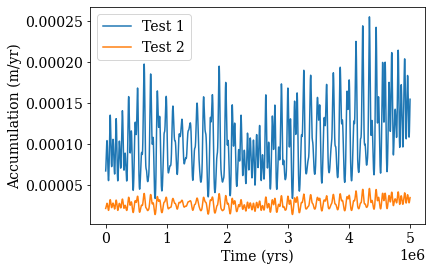

In [10]:
# Accumulation in time
accumulation1_full = tr1.accuModel.get_accumulation_at_t(times1)
accumulation2_full = tr2.accuModel.get_accumulation_at_t(times2)

plt.plot(times1, accumulation1_full, label='Test 1')
plt.plot(times2, accumulation2_full, label='Test 2')
plt.legend()
plt.ylabel('Accumulation (m/yr)')
plt.xlabel('Time (yrs)')
plt.show()